In [29]:
import ginsim 
import biolqm
import maboss
import pypint
from pypint import Goal #
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [30]:
lrg = ginsim.load("/tmp/colomoto4ex4sc2y_BCCFINAL.zginml")

In [31]:
#Loading of the Basal Cell Carcinoma model
gsim_mod = lrg

#Vizualisation of the Basal Cell Carcinoma model
ginsim.show(gsim_mod)

In [32]:
#Converions needed
blqm_mod = ginsim.to_biolqm(gsim_mod)
mbss_mod = ginsim.to_maboss(gsim_mod)
pnt_mod = biolqm.to_pint(blqm_mod)

In [33]:
pnt_mod.summary()

{'nb_automata': 160,
 'nb_local_states': 320,
 'max_local_states': 2,
 'nb_transitions': 554,
 'nb_states': 1461501637330902918203684832716283019655932542976}

In [34]:
nodes_phenotype = { "Node": ['BAX', 'FAS', 'BAD', 'CASP8', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'CFLAR', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'RPS6KB1', 'GLI_g', 'PGE2', 'YAP1', 'FLG', 'KRT1', 'KRT17', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'IL8', 'GADD45A', 'CDKN1A', 'SFN', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL5', 'CSF3', 'S100A7', 'S100A8', 'S100A9', 'DEFB4A', 'EP2_g', 'IL4', 'IL6', 'CCL17', 'CCL22', 'IL19', 'IL23', 'IL36', 'IL1B', 'TNFa', 'CCL2', 'CCL5', 'CCL20'],
                   "Phenotype": ['Apoptosis', 'Apoptosis', 'Apoptosis', 'Apoptosis', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Differentiation', 'Differentiation', 'Differentiation', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Cell cycle arrest', 'Cell cycle arrest', 'Cell cycle arrest', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Th2', 'Th2', 'Th2', 'Th2', 'Th2', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17']} 



In [35]:
df_phen = pd.DataFrame(data=nodes_phenotype)
df_phen.style.hide_index()

Node,Phenotype
BAX,Apoptosis
FAS,Apoptosis
BAD,Apoptosis
CASP8,Apoptosis
BCL2,Survival
CCND1,Survival
CCND2,Survival
TERT,Survival
BIRC5,Survival
SOX9,Survival


In [36]:
#Set the marker genes with corresponding phenotype
marker_nodes = ['BAX', 'FAS', 'BAD', 'CASP8', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'CFLAR', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'RPS6KB1', 'GLI_g', 'PGE2', 'YAP1', 'FLG', 'KRT1', 'KRT17', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'IL8', 'GADD45A', 'CDKN1A', 'SFN', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL5', 'CSF3', 'S100A7', 'S100A8', 'S100A9', 'DEFB4A', 'EP2_g', 'IL4', 'IL6', 'CCL17', 'CCL22', 'IL19', 'IL23', 'IL36', 'IL1B', 'TNFa', 'CCL2', 'CCL5', 'CCL20']
phenotype = [['Apoptosis', 'Apoptosis', 'Apoptosis', 'Apoptosis', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Differentiation', 'Differentiation', 'Differentiation', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Cell cycle arrest', 'Cell cycle arrest', 'Cell cycle arrest', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Th2', 'Th2', 'Th2', 'Th2', 'Th2', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17'], marker_nodes]

In [37]:
fpoints = pd.read_csv('stable_states.csv') #stablestaes.csv file derived from GINsim

# Testing different states

In [38]:
#setting state values(0/1) for inputs in various condition
inpBCC = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 FAT4%1 TGFB1%1 IFNY%1 RHOA%1")
inpTP53 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%1 FZD%0 TNFRSF1A%0 IL22R%0 IL17R%0 EP2%0 VDR%0 DNAdam%1 IL6R%0 IL4R%0")
inpTh2 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%1 FZD%0 TNFRSF1A%0 IL22R%0 IL17R%0 EP2%0 VDR%0 DNAdam%0 IL6R%1 IL4R%1")
inpTh17 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%1 FZD%0 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 DNAdam%0 IL6R%0 IL4R%0")

In [39]:
#Computing stable states
fpoints_inpBCC = biolqm.fixpoints(inpBCC)
fpoints_inpBCC_df = pd.DataFrame(fpoints_inpBCC)
fpoints_inpBCC_df = fpoints_inpBCC_df[marker_nodes]
fpoints_inpBCC_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])


fpoints_inpTP53 = biolqm.fixpoints(inpTP53)
fpoints_inpTP53_df = pd.DataFrame(fpoints_inpTP53)
fpoints_inpTP53_df = fpoints_inpTP53_df[marker_nodes]
fpoints_inpTP53_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

fpoints_inpTh2 = biolqm.fixpoints(inpTh2)
fpoints_inpTh2_df = pd.DataFrame(fpoints_inpTh2)
fpoints_inpTh2_df = fpoints_inpTh2_df[marker_nodes]
fpoints_inpTh2_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

fpoints_inpTh17 = biolqm.fixpoints(inpTh17)
fpoints_inpTh17_df = pd.DataFrame(fpoints_inpTh17)
fpoints_inpTh17_df = fpoints_inpTh17_df[marker_nodes]
fpoints_inpTh17_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#Making a table with all conditions
All_dataframe = [fpoints_inpBCC_df, fpoints_inpTP53_df, fpoints_inpTh2_df, fpoints_inpTh17_df]
All_dataframe_print = pd.concat(All_dataframe, keys=["BCC condition", "TP53", "Th2", "Th17"])


In [40]:
All_dataframe_print = All_dataframe_print.drop_duplicates()
All_dataframe_print

Phenotype       Apoptosis               Survival                              \
Node                  BAX FAS BAD CASP8     BCL2 CCND1 CCND2 TERT BIRC5 SOX9   
BCC condition 0         0   0   0     0        1     1     1    1     1    1   
TP53          0         1   1   1     1        0     0     0    0     0    0   
              4         1   1   1     1        0     0     1    0     0    0   
Th2           0         0   0   0     0        1     1     1    1     1    1   
Th17          0         0   0   0     0        1     1     1    1     1    1   

Phenotype             Proliferation                                            \
Node            CFLAR        PDGFRA MYCN LGR5 IGF2BP1 RPS6KB1 GLI_g PGE2 YAP1   
BCC condition 0     1             1    1    1       1       1     1    1    1   
TP53          0     0             0    0    0       0       0     0    0    1   
              4     1             1    1    0       0       0     1    0    1   
Th2           0     1             1    1    1       1       1     1    1    1   
Th17          0     1             1    1    1       1       1     1    1    1   

Phenotype       Differentiation            Tissue remodeling and angiogenesis  \
Node                        FLG KRT1 KRT17                               MMP1   
BCC condition 0               0    0     1                                  1   
TP53          0               0    1     1                                  0   
              4               0    0     1                                  0   
Th2           0               0    0     1                                  1   
Th17          0               0    0     1                                  1   

Phenotype                                    Cell cycle arrest             \
Node            MMP3 MMP9 FST LTB4 PGF2a IL8           GADD45A CDKN1A SFN   
BCC condition 0    1    1   1    1     1   1                 0      0   0   
TP53          0    0    0   0    0     0   0                 1      1   1   
              4    0    1   1    0     0   0                 1      1   1   
Th2           0    1    1   1    1     1   0                 0      0   0   
Th17          0    1    1   1    1     1   1                 0      0   0   

Phenotype       Immune cells                        Tumoral inflammation  \
Node                    CCL7 CXCL1 CXCL2 CXCL5 CSF3               S100A7   
BCC condition 0            1     1     1     1    1                    1   
TP53          0            0     1     0     1    0                    0   
              4            0     1     1     1    0                    0   
Th2           0            1     1     1     1    0                    1   
Th17          0            1     1     1     1    1                    1   

Phenotype                                  Th2                      Th17       \
Node            S100A8 S100A9 DEFB4A EP2_g IL4 IL6 CCL17 CCL22 IL19 IL23 IL36   
BCC condition 0      1      1      1     1   1   1     1     1    1    1    1   
TP53          0      1      0      0     0   0   1     0     0    0    0    0   
              4      1      1      0     0   1   1     0     0    0    0    0   
Th2           0      1      1      0     1   1   1     1     1    0    0    0   
Th17          0      1      1      1     1   1   1     0     0    1    1    1   

Phenotype                                  
Node            IL1B TNFa CCL2 CCL5 CCL20  
BCC condition 0    1    1    1    1     1  
TP53          0    0    0    0    0     1  
              4    0    0    0    0     1  
Th2           0    1    0    1    1     1  
Th17          0    1    1    1    1     1

In [41]:
#removing duplicates
fpoints_inpBCC_df = fpoints_inpBCC_df.drop_duplicates()
fpoints_inpTP53_df = fpoints_inpTP53_df.drop_duplicates()
fpoints_inpTh2_df = fpoints_inpTh2_df.drop_duplicates()
fpoints_inpTh17_df = fpoints_inpTh17_df.drop_duplicates()

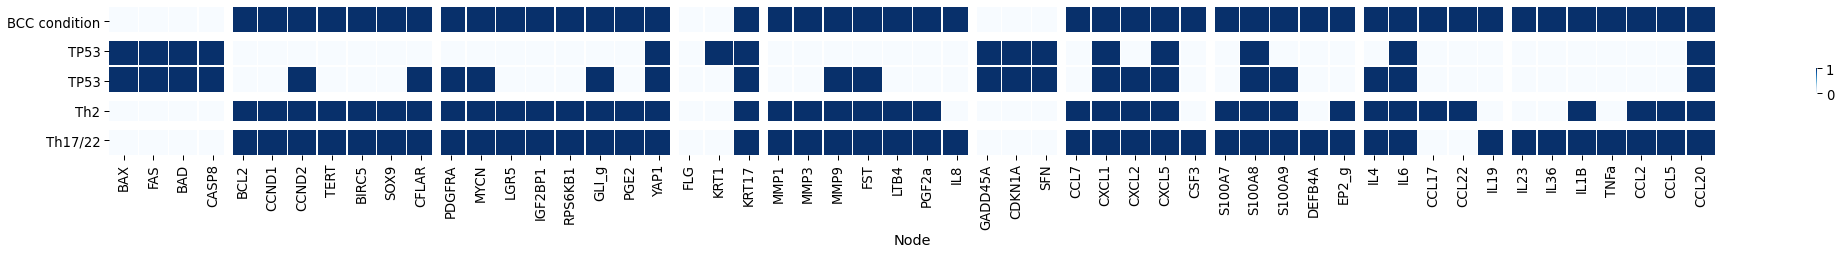

In [53]:
#Making heatmap
All_heatmap = [fpoints_inpBCC_df, fpoints_inpTP53_df, fpoints_inpTh2_df, fpoints_inpTh17_df]
all_heatmap_r = pd.concat(All_heatmap, keys=["BCC condition", "TP53", "Th2", "Th17/22"])
all_heatmap_r.index = all_heatmap_r.index.droplevel(1)
all_heatmap_r.columns = all_heatmap_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)



f = sns.heatmap(all_heatmap_r, cmap = "Blues", square = True, linewidth=0.5, cbar_kws={"shrink": .01})
ax.axvline(4, 0, 5, linewidth=9, c='white')
ax.axvline(11, 0, 5, linewidth=9, c='white')
ax.axvline(19, 0, 5, linewidth=9, c='white')
ax.axvline(22, 0, 5, linewidth=9, c='white')
ax.axvline(29, 0, 5, linewidth=9, c='white')
ax.axvline(32, 0, 5, linewidth=9, c='white')
ax.axvline(37, 0, 5, linewidth=9, c='white')
ax.axvline(42, 0, 5, linewidth=9, c='white')
ax.axvline(47, 0, 5, linewidth=9, c='white')
ax.axhline(1, 0, 5, linewidth=9, c='white')
ax.axhline(3, 0, 5, linewidth=9, c='white')
ax.axhline(4, 0, 5, linewidth=9, c='white')

plt.show()

f.figure.savefig('heatmap_validation_fBCC.pdf', dpi = 300)



# MUTATION PREDICTION WITH PINT

Identification of mutations to prevent goal reachability, goal being set as BCC phenotype

In [19]:
#Set the marker genes to set to BCC phenotype
pnt_marker_nodes = ['BAX=0', 'FAS=0', 'BAD=0', 'CASP8=0', 'BCL2=1', 'CCND1=1', 'CCND2=1', 'TERT=1', 'BIRC5=1', 'SOX9=1', 'CFLAR=1', 'FOXE1=1', 'PDGFRA=1', 'MYCN=1', 'LGR5=1', 'IGF2BP1=1', 'KRT17=1', 'RPS6KB1=1', 'GLI_g=1', 'PGE2=1', 'YAP1=1', 'IL8=1', 'IL19=1', 'FLG=0', 'KRT1=0', 'MMP1=1', 'MMP3=1', 'MMP9=1', 'FST=1', 'LTB4=1', 'PGF2a=1', 'GADD45A=0', 'CDKN1A=0', 'SFN=0', 'CCL7=1', 'CXCL1=1', 'CXCL2=1', 'CXCL5=1', 'CSF3=1', 'S100A7=1', 'S100A8=1', 'S100A9=1', 'DEFB4A=1', 'EP2_g=1', 'IL4=1', 'IL6=1', 'CCL17=1', 'CCL22=1', 'IL23=1', 'IL36=1', 'IL1B=1', 'TNFa=1', 'CCL2=1', 'CCL5=1', 'CCL20=1']

In [20]:
%%capture
mut_pint = []
n = pnt_mod.having({"GNAS":0, "PTCH1":0, "FZD":1, "TNFRSF1A":1, "IL22R":1, "IL17R":1, "EP2":1, "VDR":0, "TP53":0, "DNAdam":1, "IL6R":1, "IL4R":1, "FAT4":1, "TGFB1":1, "IFNY":1, "RHOA":1 })

for g in pnt_marker_nodes:
    mut = list(n.oneshot_mutations_for_cut(g, maxsize=2))
    mut_pint.extend(mut)

In [21]:
import collections   
        
counts = collections.Counter(tuple(sorted(x.items())) for x in mut_pint)

comb = pd.DataFrame(list(counts.items()),columns = ['Perturbation', 'Frequency'])
comb.sort_values(by=['Frequency'], ascending= False)

,Perturbation,Frequency
2,"((VDR, 1),)",15
5,"((GSK3B, 1),)",12
0,"((PRKACA, 1),)",10
3,"((SUFU, 1),)",10
4,"((GLI_f, 0),)",10
6,"((CSNK1A1, 1),)",10
24,"((SOCS3, 1),)",8
50,"((EP2, 0),)",6
97,"((EP2, 0), (VDR, 1))",6
91,"((NFKB, 0), (VDR, 1))",5
